In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import the necessary modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime

pd.options.display.max_columns = 100
pd.set_option('float_format', '{:f}'.format)

In [13]:
data = pd.read_csv('C:/Users/Alvaro Santoma/Documents/ASOS aws/Sprint 6/Notebooks/prueba_girada_1.csv', sep=";")

In [14]:
data.shape

(463167, 54)

In [15]:
data["Churn"] = ([1 if ((x==3) |(x==6) |(x==9)) else 0 for x in data["TIPO_CLIENTE"]])


In [16]:
data.loc[data["Churn"]==1].iloc[1:10,1:2]

,ID_SECTOR_SUPPLY
29,700000007073.000000
38,700000009738.000000
43,700000010296.000000
53,700000011401.000000
63,700000011773.000000
80,700000012312.000000
108,700000012855.000000
121,700000012948.000000
141,700000013226.000000


### Feature Engineering

In [17]:
X = data.iloc[:,3:27]
y = data["Churn"]

In [18]:
y.sum()/len(y)

0.05951632996305868

In [19]:
data.describe()

,Unnamed: 0,ID_SECTOR_SUPPLY,TIPO_CLIENTE,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,BILL7,BILL8,BILL9,BILL10,BILL11,BILL12,BILL13,BILL14,BILL15,BILL16,BILL17,BILL18,BILL19,BILL20,BILL21,BILL22,BILL23,BILL24,CONSUM1,CONSUM2,CONSUM3,CONSUM4,CONSUM5,CONSUM6,CONSUM7,CONSUM8,CONSUM9,CONSUM10,CONSUM11,CONSUM12,CONSUM13,CONSUM14,CONSUM15,CONSUM16,CONSUM17,CONSUM18,CONSUM19,CONSUM20,CONSUM21,CONSUM22,CONSUM23,CONSUM24,Churn,SUMA_CONSUMOS,SUMA_BILLS
count,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000,463167.000000
mean,231583.000000,700336667679.363037,3.710046,31.329495,31.239117,31.027620,30.728031,30.600682,30.449816,30.176832,30.065876,29.860905,29.688401,29.630056,29.614024,29.619287,29.693467,29.829124,30.181503,30.367403,30.681466,31.150478,31.416715,48.182286,32.407932,33.005744,33.849731,314.747877,740.295869,314.316718,571.531092,525.247861,312.337705,519.710614,310.677745,296.799389,300.950375,301.479162,733.858537,947.615744,301.792752,303.814748,323.906780,322.806131,522.837315,313.146755,1181.011967,964.413491,430.180013,430.392804,332.574411,0.059516,11616.445854,754.795989
std,133704.940402,4987760052.513371,1.151763,62.673136,68.406087,66.984841,64.268465,63.971368,66.796815,62.767251,62.064318,61.802714,62.245001,62.592258,61.835876,61.875005,63.024018,62.689056,67.595401,66.171622,65.250886,64.212076,87.924078,11082.358140,64.071037,61.908621,69.117343,4644.017946,207806.668546,4730.843113,149875.649970,147009.562218,5055.558557,146948.676131,5023.887344,1306.854725,2902.819896,2883.307346,293888.992357,328572.525718,2956.242843,2960.420402,14830.193344,14755.288555,146948.184920,1911.505083,464667.044749,440820.588569,73529.073567,73478.945722,2054.459745,0.236589,1086411.757804,11152.353100
min,0.000000,700000000004.000000,1.000000,-2008.210000,-1828.455000,-2068.380000,-3964.085000,-2054.970000,-2212.120000,-4669.240000,-4606.180000,-2461.010000,-5526.490000,-1937.870000,-2280.650000,-4133.960000,-3600.930000,-3729.120000,-1959.570000,-4203.320000,-4362.210000,-5276.140000,-41672.750000,-3777.270000,-3362.650000,-2494.330000,-5104.110000,-4790.500000,-1325.000000,-7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-170.000000,0.000000,0.000000,0.000000,0.000000,-750.000000,-11.000000,0.000000,-74.000000,-596.000000,-408.000000,-157.000000,0.000000,-260.000000,-294.000000,0.000000,-538.000000,-24688.580000
25%,115791.500000,700000990072.500000,4.000000,10.090000,9.950000,9.675000,9.460000,9.410000,9.410000,9.410000,9.410000,9.410000,9.410000,9.410000,9.410000,9.410000,9.470000,9.790000,10.210000,10.810000,11.560000,12.650000,13.250000,13.640000,13.660000,14.080000,14.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,4.000000,7.000000,11.000000,0.000000,1200.000000,363.510000
50%,231583.000000,700002019618.000000,4.000000,23.160000,23.070000,23.010000,22.830000,22.690000,22.570000,22.420000,22.320000,22.160000,22.080000,22.080000,22.060000,22.080000,22.110000,22.205000,22.420000,22.590000,22.860000,23.060000,23.360000,23.660000,24.045000,24.390000,24.985000,120.000000,119.000000,118.000000,118.000000,116.000000,115.500000,115.000000,114.000000,113.000000,113.000000,113.000000,113.0000

### Preprocessing

In [20]:
X.head()

,BILL1,BILL2,BILL3,BILL4,BILL5,BILL6,BILL7,BILL8,BILL9,BILL10,BILL11,BILL12,BILL13,BILL14,BILL15,BILL16,BILL17,BILL18,BILL19,BILL20,BILL21,BILL22,BILL23,BILL24
0,27.436667,19.365000,19.205000,20.110000,23.150000,18.890000,20.060000,17.870000,18.140000,18.940000,20.070000,0.000000,18.780000,19.420000,22.660000,21.130000,25.340000,20.910000,21.050000,19.360000,19.310000,20.060000,16.070000,20.270000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,146.430000,0.000000,0.000000,0.000000,0.000000,122.870000,121.970000,122.720000,127.480000,121.920000,0.000000
2,18.415000,19.320000,19.860000,21.640000,22.105000,23.020000,24.535000,26.795000,31.805000,23.960000,25.210000,17.420000,18.730000,19.370000,21.340000,19.480000,25.180000,18.630000,20.440000,33.810000,44.620000,19.860000,17.990000,18.680000
3,28.820000,0.000000,0.000000,0.000000,0.000000,0.000000,15.690000,25.570000,0.000000,15.520000,17.790000,18.320000,13.640000,36.690000,22.940000,0.000000,0.000000,26.690000,0.000000,0.000000,26.690000,0.000000,0.000000,26.690000
4,48.220000,53.010000,56.250000,63.720000,55.410000,57.160000,46.450000,56.630000,41.340000,57.180000,24.020000,27.820000,20.820000,27.060000,24.350000,22.590000,22.590000,25.030000,26.090000,26.050000,28.050000,38.190000,18.970000,49.070000


### Split

In [21]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

### Modelling RF

In [22]:
# Instantiate the classifier: 
rf_clf = RandomForestClassifier(n_estimators=10, criterion="gini", max_depth=None, min_samples_split=2, 
                                min_samples_leaf=1, max_features="auto",
                                bootstrap=True, n_jobs=1, random_state=123)

# Fit the classifier to the training set
rf_clf.fit(X_train,  y_train)

# Predict the labels of the test set:
y_pred = rf_clf.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.9589027786773755


In [23]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[86162   914]
 [ 2893  2665]]


In [24]:
from time import time
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_estimators = 10, criterion = "entropy", bootstrap =True, random_state=123,
                                n_jobs=2, verbose=True
                                ) 

param_grid = {"max_depth": [3, 10, 20, None],
              "max_features": [4, 10, 17],           # sqrt(X.columns)=log2(X.columns)=4
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 3, 10]}

grid_rfc = GridSearchCV(estimator=rf_clf, 
                      param_grid=param_grid, 
                      cv= 5)
start = time()
grid_rfc.fit(X_train, y_train)

# Print the best parameters and accuracy
print("Best parameters found: ", grid_rfc.best_params_)
print("Accuracy best model: ", grid_rfc.best_score_)

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    1.7s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    4.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    3.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    6.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    5.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   13.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   13.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   13.5s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   23.9s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   22.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   22.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   22.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   23.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   13.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   12.8s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   27.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   32.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   30.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   30.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   32.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   20.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   20.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   20.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   20.7s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   34.9s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   36.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   34.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   36.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   36.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   35.2s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.9s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    9.7s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   26.8s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   25.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   26.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   25.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   25.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]

[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   40.1s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   40.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   39.5s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   38.6s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   38.8s finished
[Parallel(n_jobs=2)]

Best parameters found:  {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy best model:  0.9609562441132099


[Parallel(n_jobs=2)]: Done  10 out of  10 | elapsed:   15.5s finished


In [25]:
from itertools import product

def my_product(dicts):
    return (dict(zip(dicts, x)) for x in product(*dicts.values()))

print("Number of combinations:", len(list(my_product(param_grid))))# Utility function to report best scores
print("")

def report(results, n_top=len(list(my_product(param_grid)))):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_rfc.cv_results_['params'])))
report(grid_rfc.cv_results_)

Number of combinations: 108

GridSearchCV took 82972.12 seconds for 108 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.961 (std: 0.000)
Parameters: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.961 (std: 0.000)
Parameters: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 5}

Model with rank: 3
Mean validation score: 0.961 (std: 0.000)
Parameters: {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}

Model with rank: 4
Mean validation score: 0.961 (std: 0.001)
Parameters: {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}

Model with rank: 4
Mean validation score: 0.961 (std: 0.001)
Parameters: {'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 5}

Model with rank: 4
Mean validation score: 0.961 (std: 0.001)
Parameters: {'max_depth': None,

Parace que los mejores modelos se encuentran en:
    - Maxdepth: None
    - Maxfeatures: 10 (max). Tendremos que explorar valores entre estos.
    - Min_samples_leaf: 3
    - min_samples_splits: 10

In [26]:
# Import the necessary modules
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier: 
rf_clf_final = RandomForestClassifier(n_estimators=100, max_features=10, max_depth=None, min_samples_split=10, 
                                min_samples_leaf=3, min_weight_fraction_leaf=0.0, criterion="gini", 
                                max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                bootstrap=True, oob_score=False, n_jobs=1, verbose=0, warm_start=False, 
                                class_weight=None, random_state=123)

# Fit the classifier to the training set
rf_clf_final.fit(X,  y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [27]:
# Predict the labels of the test set:
y_predic = rf_clf_final.predict(X_test)

# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_predic==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

#p0, p1

accuracy: 0.9767687889975603


In [41]:
x = data.iloc[2345:2346,3:51]
rf_clf_final.predict(x)
rf_clf_final.predict_proba(x)

array([[0.984375, 0.015625]])

In [28]:
# Confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_predic))

[[86659   417]
 [ 1735  3823]]


In [29]:
# Performance analysis
confusion_mat = confusion_matrix(y_test, y_predic)

tn = confusion_mat[0,0]
tp = confusion_mat[1,1]
fp = confusion_mat[1,0]
fn = confusion_mat[0,1]

accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy: " + str(accuracy))
misclassification_rate = 1 - accuracy
print("misclassification_rate: " + str(misclassification_rate))
recall = tp / (tp + fn)
print("recall: " + str(recall))
precision = tp / (tp + fp)
print("precision: " + str(precision))
null_error_rate = tn / (tp + tn + fp + fn)
print("null_error_rate: " + str(null_error_rate))

Accuracy: 0.9767687889975603
misclassification_rate: 0.023231211002439744
recall: 0.9016509433962264
precision: 0.6878373515653112
null_error_rate: 0.9354988449165533


Feature ranking:
1. feature 18 BILL1 (0.158141)
2. feature 0 BILL2 (0.120033)
3. feature 19 BILL3 (0.115559)
4. feature 20 BILL4 (0.078747)
5. feature 17 BILL5 (0.061526)
6. feature 24 BILL6 (0.058615)
7. feature 21 BILL7 (0.044445)
8. feature 1 BILL8 (0.032334)
9. feature 22 BILL9 (0.027602)
10. feature 16 BILL10 (0.026918)
11. feature 42 BILL11 (0.017775)
12. feature 41 BILL12 (0.015296)
13. feature 2 BILL13 (0.013056)
14. feature 43 BILL14 (0.012498)
15. feature 23 BILL15 (0.011918)
16. feature 15 BILL16 (0.011350)
17. feature 25 BILL17 (0.011127)
18. feature 3 BILL18 (0.009951)
19. feature 14 BILL19 (0.008919)
20. feature 4 BILL20 (0.008526)
21. feature 26 BILL21 (0.008335)
22. feature 9 BILL22 (0.007666)
23. feature 5 BILL23 (0.007613)
24. feature 6 BILL24 (0.007415)
25. feature 8 CONSUM1 (0.007189)
26. feature 10 CONSUM2 (0.007013)
27. feature 44 CONSUM3 (0.006973)
28. feature 7 CONSUM4 (0.006573)
29. feature 40 CONSUM5 (0.006566)
30. feature 13 CONSUM6 (0.006469)
31. feature 27 

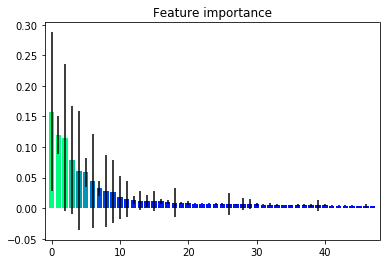

In [60]:
# Feature importance
importances = rf_clf_final.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf_final.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
names = X.columns

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], names[f], importances[indices[f]]))
    
# Plot the feature importances of the forest
import matplotlib
cmap = matplotlib.cm.winter
norm = matplotlib.colors.Normalize(vmin=-20, vmax=10)

plt.figure()
plt.title("Feature importance")
plt.bar(range(X.shape[1]), importances[indices],
       color= cmap(importances[indices]*10), yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go

# Scatter plot 
trace = go.Scatter(
    y = rf_clf_final.feature_importances_,
    x = X.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf_clf_final.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

## Pickle del modelo

In [15]:
import pickle

filename = 'modelo_cesa_no_cesa'
outfile = open(filename,'wb')
pickle.dump(rf_clf_final,outfile)
outfile.close()

### Modelling ANN

In [17]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [18]:
# Predict the labels of the test set:
y_pred = clf.predict(X_test)

In [20]:
# Compute the accuracy of the predictions: accuracy
accuracy = float(np.sum(y_pred==y_test))/y_test.shape[0]
print("accuracy:", accuracy)

accuracy: 0.8672510599289561


In [21]:
# other evaluation metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      1.00      0.93     30274
          1       0.00      0.00      0.00      4634

avg / total       0.75      0.87      0.81     34908



C:\Users\Gonzalo.Espinosa\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.grid_search import GridSearchCV

import itertools

In [37]:
# Pipeline

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

from sklearn.grid_search import GridSearchCV

import itertools

from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf_clf = RandomForestClassifier(n_estimators = 20, criterion = "entropy", bootstrap =True, random_state=123,
                                min_samples_leaf= 1, min_samples_split= 10,
                                n_jobs= 2
                                ) 

steps = [("scale", StandardScaler()),
        ("reduction", PCA()),
         "rf", rf_clf]

pipeline = Pipeline(steps)

### fit your pipeline on X_train and y_train
pipeline.fit( X_train, y_train )
### call pipeline.predict() on your X_test data to make a set of test predictions
y_prediction = pipeline.predict( X_test )
### test your predictions using sklearn.classification_report()
report = sklearn.metrics.classification_report( y_test, y_prediction )
### and print the report
print(report)

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [ ]:
# Pipeline + GridSearch
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.grid_search import GridSearchCV

import itertools

import sklearn.grid_search
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

steps = [("scale", StandardScaler()),
        ("reduction", PCA()),
         "rf", clf_rf]

parameters = dict(
              "reduction__k"=[10, 20, 30],
              "rf__maxdepth" = [None, 3, 6, 10, 30, 50]
              "rf__min_samples_split"=[2, 3, 4, 5, 10]
                )

pipe = Pipeline(steps)

cv = GridSearchCV(pipe, param_grid=parameters)

cv.fit(X_train, y_train)

y_predictions = cv.predict(X_test)
report = sklearn.metrics.classification_report( y_test, y_predictions )

In [ ]:
# Advanced pipeline + gridsearch

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion

from sklearn.grid_search import GridSearchCV

import itertools

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(X, y, test_size=0.33, random_state=42)

rf_clf = RandomForestClassifier(n_estimators = 20, criterion = "entropy", bootstrap =True, random_state=123,
                                min_samples_leaf= 1, min_samples_split= 10,
                                n_jobs= 2
                                ) 

steps = [("scale", StandardScaler()),
        ("reduce_dim", PCA()),
         "rf", clf_rf]

params = [
        {'scale': [StandardScaler(), MinMaxScaler(), RobustScaler(),Normalizer(),  QuantileTransformer()],
         'reduce_dim': [PCA(n_components=2), 
                        MDS(n_components=2, max_iter=100, n_init=1,metric=True)
                        KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10),
                        KernelPCA(kernel="poly", fit_inverse_transform=True, degree=3, coef0 =1),
                        KernelPCA(kernel="sigmoid", fit_inverse_transform=True, coef0 =1),
                        KernelPCA(kernel="cosine", fit_inverse_transform=True, gamma=10)
                        Isomap(n_neighbors=10, n_components=2), 
                        LocallyLinearEmbedding(n_neighbors, n_components=2),
                       TSNE(n_components=2)],
          'reduce_dim__n_components': [3, 12, 30, 50],
          "rf__maxdepth" = [None, 3, 6, 10, 30, 50]
          "rf__min_samples_split"=[2, 3, 4, 5, 10]}
        ]

pipe = Pipeline(steps)

cv = GridSearchCV(pipe, param_grid=parameters)

cv.fit(X_train, y_train)

y_predictions = cv.predict(X_test)
report = sklearn.metrics.classification_report( y_test, y_predictions )